In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os

In [302]:
campaign_df.head(2)

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26


In [303]:
coupon_redempt_df.head(2)

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8


In [304]:
demographic_df.head(2)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,15-24K,Homeowner,Unknown,1,None/Unknown,3


In [306]:
transaction_train_df.head(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DEPARTMENT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,PRODUCE
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0,PRODUCE


In [2]:
campaign_df = pd.read_csv('campaign_table.csv')
coupon_redempt_df = pd.read_csv('coupon_redempt.csv')
demographic_df = pd.read_csv('Demographic.csv')
transaction_test_df = pd.read_csv('transaction_test.csv')
transaction_train_df = pd.read_csv('transaction_train.csv') 

# Transactional data preparation

In [3]:
## MONTH

month_days = [31,28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
i=1
s=0
days=[]
m_days={}
for ix, d in enumerate(month_days):
    s+=d
    while i<=s:
        days.append(i)
        m_days[i]=ix+1
        i+=1

In [4]:
# CREATE QUARTER

months=list(range(1,25))
s=[months[i:i+3] for i in range(0, 24,3)]
month_quarter={}
for ix, i in enumerate(s):
    for j in i:
        month_quarter[j]=ix+1


# DROP DUPLICATES

In [5]:
demographic_df.duplicated('household_key').any()

False

In [6]:
coupon_redempt_df.duplicated(['household_key','DAY','COUPON_UPC','CAMPAIGN']).any()

False

In [7]:
campaign_df.duplicated(['DESCRIPTION','household_key','CAMPAIGN']).any()

False

In [8]:
transaction_train_df.duplicated(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'STORE_ID', 'DEPARTMENT'] ).any()

False

In [9]:
transaction_test_df.duplicated(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'STORE_ID', 'DEPARTMENT'] ).any()

False

In [10]:
demographic_df['household_key'].duplicated().any()

False

# BASIC DOMAIN CHECKS 

In [12]:
transaction_train_df.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06,1.783033e+06
mean,1.283147e+03,3.398640e+10,3.870594e+02,2.890923e+06,1.019575e+02,3.102665e+00,2.951391e+03,-5.404261e-01,1.561707e+03,5.597532e+01,-1.763832e-02,-3.264309e-03
std,7.326770e+02,4.705205e+09,1.898001e+02,3.832707e+06,1.173702e+03,4.241652e+00,8.652991e+03,1.266344e+00,4.008090e+02,2.711228e+01,2.225795e-01,4.199812e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,6.760000e+02,3.022918e+10,2.270000e+02,9.173840e+05,1.000000e+00,1.290000e+00,3.290000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.274000e+03,3.275970e+10,3.890000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.690000e+02,-4.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.944000e+03,4.009766e+10,5.510000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.210000e+02,0.000000e+00,1.844000e+03,7.900000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,2.090000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [147]:
transaction_test_df.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,713927.000000,7.139270e+05,713927.000000,7.139270e+05,713927.000000,713927.000000,713927.000000,713927.000000,713927.000000,713927.000000,713927.000000,713927.000000
mean,1246.855596,3.304885e+10,353.427762,2.795958e+06,97.049569,3.097203,3420.993865,-0.534655,1561.507056,51.185090,-0.013933,-0.002232
std,711.750601,4.009099e+09,168.132436,3.687185e+06,1105.823898,4.069763,9310.912751,1.207291,400.492125,24.024884,0.203330,0.034897
min,2.000000,2.698504e+10,1.000000,2.619000e+04,0.000000,0.000000,12.000000,-130.020000,0.000000,1.000000,-37.930000,-3.500000
25%,610.000000,3.005396e+10,213.000000,9.173870e+05,1.000000,1.290000,333.000000,-0.690000,1306.000000,31.000000,0.000000,0.000000
50%,1269.000000,3.220464e+10,356.000000,1.027569e+06,1.000000,2.000000,374.000000,0.000000,1615.000000,52.000000,0.000000,0.000000
75%,1844.000000,3.457704e+10,498.000000,1.131312e+06,1.000000,3.490000,427.000000,0.000000,1845.000000,72.000000,0.000000,0.000000
max,2499.000000,4.133837e+10,638.000000,1.738220e+07,48073.000000,631.800000,34280.000000,3.990000,2359.000000,92.000000,0.000000,0.000000


<h4> 1. RETAIL_DISC<0 and COUPON_DISC<0 and COUPON_MATCH_DISC<0 </h4>

In [11]:
transaction_train_df = transaction_train_df[(transaction_train_df['RETAIL_DISC']<=0) & (transaction_train_df['COUPON_DISC']<=0) & (transaction_train_df['COUPON_MATCH_DISC']<=0)]
transaction_test_df = transaction_test_df[(transaction_test_df['RETAIL_DISC']<=0) & (transaction_test_df['COUPON_DISC']<=0) & (transaction_test_df['COUPON_MATCH_DISC']<=0)]

<h4> 2. SALES_VALUE > RETAIL_DISC+ COUPON_DISC+COUPON_MATCH_DISC </h4>

In [12]:
transaction_train_df['Total_discount'] = transaction_train_df['RETAIL_DISC'] + transaction_train_df['COUPON_DISC'] + transaction_train_df['COUPON_MATCH_DISC'] 
transaction_train_df = transaction_train_df[transaction_train_df['SALES_VALUE']>transaction_train_df['Total_discount']]

################################
transaction_test_df['Total_discount'] = transaction_test_df['RETAIL_DISC'] + transaction_test_df['COUPON_DISC'] + transaction_test_df['COUPON_MATCH_DISC'] 
transaction_test_df = transaction_test_df[transaction_test_df['SALES_VALUE']>transaction_test_df['Total_discount']]


<h4> 3. Drop no department </h4>

In [13]:
transaction_train_df = transaction_train_df[transaction_train_df['DEPARTMENT']!=' ']
###################################
transaction_test_df = transaction_test_df[transaction_test_df['DEPARTMENT']!=' ']

<h4> 4. Drop quantitiy=0 sales = 0 </h4>

In [14]:
transaction_train_df = transaction_train_df[(transaction_train_df['QUANTITY']>0.0) & (transaction_train_df['SALES_VALUE']>0.0)]
#####################################
transaction_test_df = transaction_test_df[(transaction_test_df['QUANTITY']>0.0) & (transaction_test_df['SALES_VALUE']>0.0)]

In [15]:
transaction_train_df['MONTH'] = list(map(lambda x:m_days[x], transaction_train_df['DAY']))
transaction_train_df['QUARTER'] = list(map(lambda x:month_quarter[x], transaction_train_df['MONTH']))

#####################################

transaction_test_df['MONTH'] = list(map(lambda x:m_days[x], transaction_test_df['DAY']))
transaction_test_df['QUARTER'] = list(map(lambda x:month_quarter[x], transaction_test_df['MONTH']))



# Create new features and drop not required columns

In [16]:
transaction_train_df['SALES_VALUE_AFTER_DISCOUNT'] = transaction_train_df['SALES_VALUE'] - transaction_train_df['Total_discount']
transaction_train_df['SAME_ITEM_SALES_VALUE'] = transaction_train_df['QUANTITY']*transaction_train_df['SALES_VALUE_AFTER_DISCOUNT']
# transaction_train_df.drop(['TRANS_TIME', 'SALES_VALUE', 'Total_discount','RETAIL_DISC','COUPON_DISC','COUPON_MATCH_DISC', 'QUANTITY', 'SALES_VALUE_AFTER_DISCOUNT'],  axis=1, inplace=True)
# transaction_train_weekly_df = transaction_train_df[['household_key','MONTH','SAME_ITEM_SALES_VALUE','DEPARTMENT']]

transaction_train_weekly_df = transaction_train_df[['household_key','WEEK_NO','SAME_ITEM_SALES_VALUE','DEPARTMENT']]

transaction_train_quarterly_df = transaction_train_df[['household_key','QUARTER','SAME_ITEM_SALES_VALUE','DEPARTMENT']]


#####################################


transaction_test_df['SALES_VALUE_AFTER_DISCOUNT'] = transaction_test_df['SALES_VALUE'] - transaction_test_df['Total_discount']
transaction_test_df['SAME_ITEM_SALES_VALUE'] = transaction_test_df['QUANTITY']*transaction_test_df['SALES_VALUE_AFTER_DISCOUNT']
# transaction_test_df.drop(['TRANS_TIME', 'SALES_VALUE', 'Total_discount','RETAIL_DISC','COUPON_DISC','COUPON_MATCH_DISC', 'QUANTITY', 'SALES_VALUE_AFTER_DISCOUNT'],  axis=1, inplace=True)
# transaction_test_weekly_df = transaction_test_df[['household_key','MONTH','SAME_ITEM_SALES_VALUE','DEPARTMENT']]

transaction_test_weekly_df = transaction_test_df[['household_key','WEEK_NO','SAME_ITEM_SALES_VALUE','DEPARTMENT']]

transaction_test_quarterly_df = transaction_test_df[['household_key','QUARTER','SAME_ITEM_SALES_VALUE','DEPARTMENT']]


# EDA

In [20]:
hhkeys=sorted(demographic_df['household_key'].unique())


more_purchasing_customers=[]
less_purchasing_customers=[]

for k in hhkeys:
    if k in transaction_train_weekly_df.household_key.unique():
        df = transaction_train_weekly_df[transaction_train_weekly_df['household_key']==k]
        sv = df.groupby('WEEK_NO')['SAME_ITEM_SALES_VALUE'].sum().reset_index()
        kendalls_coef = sv.corr(method='kendall')['WEEK_NO']['SAME_ITEM_SALES_VALUE']
        if kendalls_coef > 0:
            more_purchasing_customers.append(k)
        else:
            less_purchasing_customers.append(k)   

In [21]:
# more purchasing

md = dict.fromkeys(transaction_train_df['DEPARTMENT'].unique(),0)

for k in more_purchasing_customers:
    if k in transaction_train_weekly_df.household_key.unique():
        d = transaction_train_weekly_df[transaction_train_weekly_df.household_key==k]['DEPARTMENT'].value_counts().to_dict()
        for k in md.keys():
            if k in d.keys():
                md[k]+=d[k]

In [22]:


# more engaging categories for more purchasing customers : categories and total spend on each of them

dict(sorted(md.items(), key=lambda x:x[1], reverse=True))

{'GROCERY': 611435,
 'DRUG GM': 100392,
 'PRODUCE': 97084,
 'MEAT-PCKGD': 40228,
 'MEAT': 32874,
 'DELI': 23628,
 'PASTRY': 13359,
 'NUTRITION': 12665,
 'KIOSK-GAS': 8416,
 'SEAFOOD-PCKGD': 3903,
 'SALAD BAR': 3595,
 'COSMETICS': 2827,
 'MISC SALES TRAN': 2331,
 'FLORAL': 1683,
 'SEAFOOD': 1593,
 'MISC. TRANS.': 998,
 'SPIRITS': 837,
 'TRAVEL & LEISUR': 322,
 'GARDEN CENTER': 284,
 'CHEF SHOPPE': 259,
 'RESTAURANT': 192,
 'COUP/STR & MFG': 145,
 'FROZEN GROCERY': 100,
 'GM MERCH EXP': 20,
 'DAIRY DELI': 20,
 'AUTOMOTIVE': 19,
 'CNTRL/STORE SUP': 11,
 'DELI/SNACK BAR': 8,
 'PHOTO': 7,
 'POSTAL CENTER': 5,
 'RX': 4,
 'TOYS': 4,
 'VIDEO RENTAL': 3,
 'MEAT-WHSE': 3,
 'PHARMACY SUPPLY': 2,
 'HBC': 1,
 'ELECT &PLUMBING': 1,
 'HOUSEWARES': 1,
 'CHARITABLE CONT': 1,
 'GRO BAKERY': 0,
 'VIDEO': 0,
 'PORK': 0}

In [23]:
# less purchasing 

md = dict.fromkeys(transaction_train_df['DEPARTMENT'].unique(),0)

for k in less_purchasing_customers:
    if k in transaction_train_weekly_df.household_key.unique():
        d = transaction_train_weekly_df[transaction_train_weekly_df.household_key==k]['DEPARTMENT'].value_counts().to_dict()
        for k in md.keys():
            if k in d.keys():
                md[k]+=d[k]

<h3> less engaging categories for less purchasing category : categories and total spend on each of them </h3>

In [24]:
dict(sorted(md.items(), key=lambda x:x[1], reverse=False))

{'DELI/SNACK BAR': 0,
 'HBC': 0,
 'ELECT &PLUMBING': 0,
 'HOUSEWARES': 0,
 'TOYS': 0,
 'VIDEO': 1,
 'PORK': 1,
 'CHARITABLE CONT': 1,
 'VIDEO RENTAL': 2,
 'PHARMACY SUPPLY': 2,
 'GRO BAKERY': 2,
 'CNTRL/STORE SUP': 3,
 'MEAT-WHSE': 3,
 'RX': 6,
 'PHOTO': 7,
 'DAIRY DELI': 10,
 'POSTAL CENTER': 13,
 'GM MERCH EXP': 14,
 'AUTOMOTIVE': 21,
 'FROZEN GROCERY': 61,
 'RESTAURANT': 78,
 'COUP/STR & MFG': 100,
 'CHEF SHOPPE': 189,
 'GARDEN CENTER': 200,
 'TRAVEL & LEISUR': 236,
 'SPIRITS': 426,
 'MISC. TRANS.': 539,
 'SEAFOOD': 956,
 'FLORAL': 1116,
 'MISC SALES TRAN': 1439,
 'COSMETICS': 1973,
 'SALAD BAR': 2259,
 'SEAFOOD-PCKGD': 2664,
 'KIOSK-GAS': 5536,
 'NUTRITION': 8202,
 'PASTRY': 10435,
 'DELI': 16321,
 'MEAT': 22824,
 'MEAT-PCKGD': 29425,
 'PRODUCE': 65685,
 'DRUG GM': 73912,
 'GROCERY': 434503}

<h3> count of less and more purchasing customer </h3>

In [25]:

len(more_purchasing_customers), len(less_purchasing_customers)

(819, 721)

# Impact of each demographic factor on sales

In [27]:
df_household_income = transaction_train_weekly_df.groupby('household_key')['SAME_ITEM_SALES_VALUE'].sum().reset_index()
demo_household_income_combined = demographic_df.merge(df_household_income, how='left', on='household_key')

<h3> Compare the total sales standard deviation with the std deviation wrt each categorical variable.  </h3>

In [43]:
x = demo_household_income_combined['SAME_ITEM_SALES_VALUE'].std()

x, demo_household_income_combined.groupby('MARITAL_STATUS_CODE')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].mean() - x


(10619521.388645517, -1187520.454884272)

In [29]:
demo_household_income_combined.groupby('AGE_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].mean() - x


-1404730.4829783011

In [31]:

# loos like low age people are purhcasing more than old age 

demo_household_income_combined.groupby('INCOME_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].mean() - x


-1586234.1748804972

In [32]:
demo_household_income_combined.groupby('HOMEOWNER_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].mean() - x


-127255.52549159713

In [33]:
demo_household_income_combined.groupby('HH_COMP_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].mean() -x


-1311143.4683340583

In [34]:
demo_household_income_combined.groupby('KID_CATEGORY_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].mean() - x


230886.79764666408

# graphical approach

<AxesSubplot:>

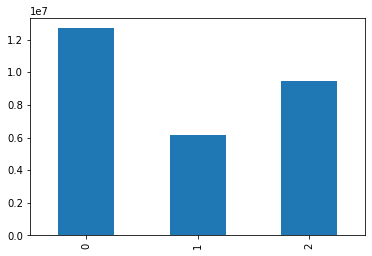

In [37]:


demo_household_income_combined.groupby('MARITAL_STATUS_CODE')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].plot(kind='bar')


<AxesSubplot:>

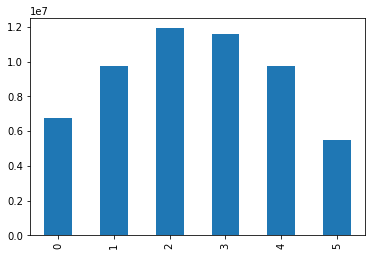

In [38]:

demo_household_income_combined.groupby('AGE_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].plot(kind='bar')



<AxesSubplot:>

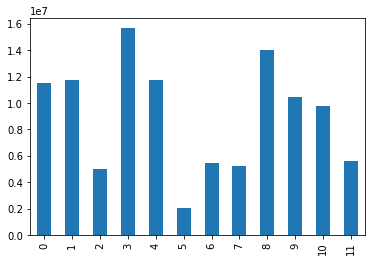

In [39]:
demo_household_income_combined.groupby('INCOME_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].plot(kind='bar')


<AxesSubplot:>

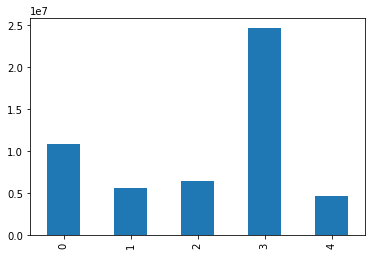

In [40]:

demo_household_income_combined.groupby('HOMEOWNER_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].plot(kind='bar')



<AxesSubplot:>

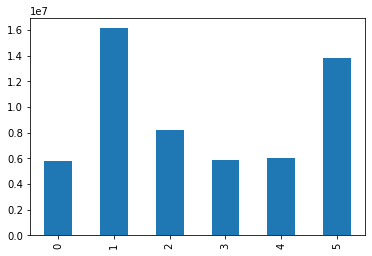

In [41]:
demo_household_income_combined.groupby('HH_COMP_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].plot(kind='bar')



<AxesSubplot:>

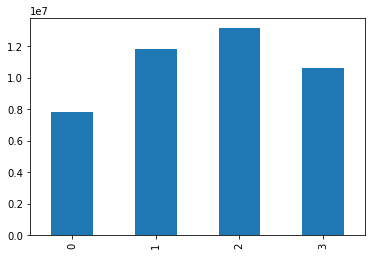

In [42]:
demo_household_income_combined.groupby('KID_CATEGORY_DESC')['SAME_ITEM_SALES_VALUE'].std().reset_index()['SAME_ITEM_SALES_VALUE'].plot(kind='bar')


<h3> Basically we are looking for a variable which is showing more variance wrt to sales.</h3>

Reference : https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

# Conclusion

Income(+), KID_CATEGORY_DESC (+), AGE_DESC(-) has large variances across them wrt to each category as compared to the total variance in the 
sales_value so these are the variables impacting most. 


In [19]:
transaction_train_quarterly_df.columns , transaction_train_quarterly_df.shape, transaction_test_quarterly_df.columns , transaction_test_quarterly_df.shape

(Index(['household_key', 'QUARTER', 'SAME_ITEM_SALES_VALUE', 'DEPARTMENT'], dtype='object'),
 (1770039, 4),
 Index(['household_key', 'QUARTER', 'SAME_ITEM_SALES_VALUE', 'DEPARTMENT'], dtype='object'),
 (708649, 4))

In [20]:
transaction_train_quarterly_df['is_nutrition']=list(map(lambda x:1 if x=='NUTRITION' else 0, transaction_train_quarterly_df['DEPARTMENT']))
transaction_train_quarterly_df.drop('DEPARTMENT', axis=1, inplace=True)

#####################################


transaction_test_quarterly_df['is_nutrition']=list(map(lambda x:1 if x=='NUTRITION' else 0, transaction_test_quarterly_df['DEPARTMENT']))
transaction_test_quarterly_df.drop('DEPARTMENT', axis=1, inplace=True)

C:\Users\ramp\AppData\Local\Temp\ipykernel_26048\2997409963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_train_quarterly_df['is_nutrition']=list(map(lambda x:1 if x=='NUTRITION' else 0, transaction_train_quarterly_df['DEPARTMENT']))
C:\Users\ramp\AppData\Local\Temp\ipykernel_26048\2997409963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_train_quarterly_df.drop('DEPARTMENT', axis=1, inplace=True)
C:\Users\ramp\AppData\Local\Temp\ipykernel_26048\2997409963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [21]:
transaction_train_quarterly_df.head()

,household_key,QUARTER,SAME_ITEM_SALES_VALUE,is_nutrition
0,2375,1,1.99,0
1,2375,1,0.82,0
2,2375,1,1.29,0
3,2375,1,1.21,0
4,2375,1,1.89,0


In [22]:
transaction_test_quarterly_df.head(2)

,household_key,QUARTER,SAME_ITEM_SALES_VALUE,is_nutrition
0,1060,1,1.79,0
1,1060,1,3.75,0


In [23]:
transaction_train_quarterly_df = transaction_train_quarterly_df.groupby(['household_key','QUARTER', 'is_nutrition']).sum('SAME_ITEM_SALES_VALUE').reset_index().rename(columns={'SAME_ITEM_SALES_VALUE':'QUARTERLY_TOTAL_SALES'})

################################

transaction_test_quarterly_df = transaction_test_quarterly_df.groupby(['household_key','QUARTER', 'is_nutrition']).sum('SAME_ITEM_SALES_VALUE').reset_index().rename(columns={'SAME_ITEM_SALES_VALUE':'QUARTERLY_TOTAL_SALES'})

In [357]:
ftrain = transaction_train_quarterly_df.copy()
ftrain = ftrain.groupby(['household_key','QUARTER']).sum(['is_nutrition','QUARTERLY_TOTAL_SALES']).reset_index()

#####################################


ftest = transaction_test_quarterly_df.copy()
ftest = ftest.groupby(['household_key','QUARTER']).sum(['is_nutrition','QUARTERLY_TOTAL_SALES']).reset_index()

In [33]:
######################################## turning point ########################

In [35]:
def create_missing_quarter_entry(df):
    for hkey in df.household_key.unique():
        all_quarters = set(range(1,9))
        present_quarters=set(df[df['household_key']==hkey].QUARTER.unique())
        missing_quarters = all_quarters - present_quarters
        for quarter in missing_quarters:
            df.loc[len(df.index)] = [hkey,quarter,0,0]    
    return df

In [358]:
ftrain = create_missing_quarter_entry(ftrain)
ftrain.sort_values(['household_key','QUARTER'], inplace=True)
ftrain.rename(columns={'QUARTER':'ROW_ID'}, inplace=True)
ftrain_binary = ftrain.pivot('household_key', 'ROW_ID', 'is_nutrition').add_prefix('Q').reset_index()
ftrain_sales = ftrain.pivot('household_key', 'ROW_ID', 'QUARTERLY_TOTAL_SALES').add_prefix('QS').reset_index()

Y = ftrain_binary['Q8']
Q8_train_sales = ftrain_sales['QS8']

ftrain_binary.drop('Q8', axis=1, inplace=True)
ftrain_sales.drop('QS8', axis=1, inplace=True)


##################################################################

ftest= create_missing_quarter_entry(ftest)
ftest.sort_values(['household_key','QUARTER'], inplace=True)
ftest.rename(columns={'QUARTER':'ROW_ID'}, inplace=True)
ftest_binary = ftest.pivot('household_key', 'ROW_ID', 'is_nutrition').add_prefix('Q').reset_index()
ftest_sales = ftest.pivot('household_key', 'ROW_ID', 'QUARTERLY_TOTAL_SALES').add_prefix('QS').reset_index()

# Ytest = ftest_binary['Q8']
Q8_test_sales = ftest_sales['QS8']

ftest_binary.drop('Q8', axis=1, inplace=True)
ftest_sales.drop('QS8', axis=1, inplace=True)

In [359]:
sales_cols=['QS1','QS2','QS3','QS4','QS5','QS6','QS7']
mins = ftrain_sales[sales_cols].min(axis=1)
maxs = ftrain_sales[sales_cols].max(axis=1)
for i in range(1,8):
    ftrain_sales['QS' + str(i)] = (ftrain_sales['QS' + str(i)] - mins )/(maxs - mins )

ftrain_sales['Total_sales'] = ftrain_sales[['QS1','QS2','QS3', 'QS4','QS5','QS6', 'QS7']].sum(axis=1)


#########################################################################

sales_cols=['QS1','QS2','QS3','QS4','QS5','QS6','QS7']
mins = ftest_sales[sales_cols].min(axis=1)
maxs = ftest_sales[sales_cols].max(axis=1)
for i in range(1,8):
    ftest_sales['QS' + str(i)] = (ftest_sales['QS' + str(i)] - mins )/(maxs - mins )

ftest_sales['Total_sales'] = ftest_sales[['QS1','QS2','QS3', 'QS4','QS5','QS6', 'QS7']].sum(axis=1)

In [62]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()  
# f_sales[['QS1','QS2','QS3', 'QS4','QS5','QS6', 'QS7']] = scaler.fit_transform(f_sales[['QS1','QS2','QS3', 'QS4','QS5','QS6', 'QS7']])
# f_sales['Total_sales'] = f_sales[['QS1','QS2','QS3', 'QS4','QS5','QS6', 'QS7']].sum(axis=1)

In [360]:
# calcaulte simple moving average, cumulative moving average, exponential moving average

ftrain_sales[['SMA2QS3','SMA2QS4','SMA2QS5','SMA2QS6','SMA2QS7']] = ftrain_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.rolling(2).mean().T.add_prefix('SMA2').drop(['SMA2QS1','SMA2QS2'], axis=1)
ftrain_sales[['SMA3QS3','SMA3QS4','SMA3QS5','SMA3QS6','SMA3QS7']] = ftrain_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.rolling(3).mean().T.add_prefix('SMA3').drop(['SMA3QS1','SMA3QS2'], axis=1)
ftrain_sales[['SMA4QS5', 'SMA4QS5','SMA4QS6','SMA4QS7']] = ftrain_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.rolling(4).mean().T.add_prefix('SMA4').drop(['SMA4QS1','SMA4QS2','SMA4QS3'], axis=1)
ftrain_sales[['CMAQS1','CMAQS2','CMAQS3','CMAQS4','CMAQS5','CMAQS6','CMAQS7']] = ftrain_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.expanding().mean().T.add_prefix('CMA')
ftrain_sales[['EMA2QS1','EMA2QS2','ECMA2QS3','EMA2QS4','EMA2QS5','EMA2QS6','EMA2QS7']] = ftrain_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.ewm(span=2).mean().T.add_prefix('EMA2')
ftrain_sales[['EMA3QS1','EMA3QS2','EMA3QS3','EMA3QS4','EMA3QS5','EMA3QS6','EMA3QS7']] = ftrain_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.ewm(span=3).mean().T.add_prefix('EMA3')

########################################################

# calcaulte simple moving average, cumulative moving average, exponential moving average
ftest_sales[['SMA2QS3','SMA2QS4','SMA2QS5','SMA2QS6','SMA2QS7']] = ftest_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.rolling(2).mean().T.add_prefix('SMA2').drop(['SMA2QS1','SMA2QS2'], axis=1)
ftest_sales[['SMA3QS3','SMA3QS4','SMA3QS5','SMA3QS6','SMA3QS7']] = ftest_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.rolling(3).mean().T.add_prefix('SMA3').drop(['SMA3QS1','SMA3QS2'], axis=1)
ftest_sales[['SMA4QS5', 'SMA4QS5','SMA4QS6','SMA4QS7']] = ftest_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.rolling(4).mean().T.add_prefix('SMA4').drop(['SMA4QS1','SMA4QS2','SMA4QS3'], axis=1)
ftest_sales[['CMAQS1','CMAQS2','CMAQS3','CMAQS4','CMAQS5','CMAQS6','CMAQS7']] = ftest_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.expanding().mean().T.add_prefix('CMA')
ftest_sales[['EMA2QS1','EMA2QS2','ECMA2QS3','EMA2QS4','EMA2QS5','EMA2QS6','EMA2QS7']] = ftest_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.ewm(span=2).mean().T.add_prefix('EMA2')
ftest_sales[['EMA3QS1','EMA3QS2','EMA3QS3','EMA3QS4','EMA3QS5','EMA3QS6','EMA3QS7']] = ftest_sales[['QS1', 'QS2', 'QS3', 'QS4', 'QS5', 'QS6', 'QS7']].T.ewm(span=3).mean().T.add_prefix('EMA3')

In [361]:
tran_train_final_df=ftrain_binary.merge(ftrain_sales, on='household_key')
tran_test_final_df=ftest_binary.merge(ftest_sales, on='household_key')

# Demographic data preparation

<h3> One hot encoded features for demographic data</h3>

In [165]:
# from sklearn.preprocessing import OneHotEncoder
# from scipy.sparse import hstack

# #### creating one hot encoding representation #### 

# oe_AGE_DESC = OneHotEncoder()
# train_AGE_DESC = oe_AGE_DESC.fit_transform(demographic_df['AGE_DESC'].values.reshape(-1,1))

# oe_MARITAL_STATUS_CODE = OneHotEncoder()
# train_MARITAL_STATUS_CODE = oe_MARITAL_STATUS_CODE.fit_transform(demographic_df['MARITAL_STATUS_CODE'].values.reshape(-1,1))

# oe_INCOME_DESC = OneHotEncoder()
# train_INCOME_DESC = oe_INCOME_DESC.fit_transform(demographic_df['INCOME_DESC'].values.reshape(-1,1))

# oe_HOMEOWNER_DESC = OneHotEncoder()
# train_HOMEOWNER_DESC = oe_HOMEOWNER_DESC.fit_transform(demographic_df['HOMEOWNER_DESC'].values.reshape(-1,1))

# oe_HH_COMP_DESC = OneHotEncoder()
# train_HH_COMP_DESC = oe_HH_COMP_DESC.fit_transform(demographic_df['HH_COMP_DESC'].values.reshape(-1,1))

# oe_HOUSEHOLD_SIZE_DESC = OneHotEncoder()
# train_HOUSEHOLD_SIZE_DESC = oe_HOUSEHOLD_SIZE_DESC.fit_transform(demographic_df['HOUSEHOLD_SIZE_DESC'].values.reshape(-1,1))

# oe_KID_CATEGORY_DESC = OneHotEncoder()
# train_KID_CATEGORY_DESC = oe_KID_CATEGORY_DESC.fit_transform(demographic_df['KID_CATEGORY_DESC'].values.reshape(-1,1))

# demo_data = hstack([train_AGE_DESC, train_MARITAL_STATUS_CODE, train_INCOME_DESC, train_HOMEOWNER_DESC,  train_HH_COMP_DESC, train_HOUSEHOLD_SIZE_DESC, train_KID_CATEGORY_DESC ])

# #####################################################################

# test_AGE_DESC = oe_AGE_DESC.transform(demographic_df['AGE_DESC'].values.reshape(-1,1))
# test_MARITAL_STATUS_CODE = oe_MARITAL_STATUS_CODE.transform(demographic_df['MARITAL_STATUS_CODE'].values.reshape(-1,1))
# test_INCOME_DESC = oe_INCOME_DESC.transform(demographic_df['INCOME_DESC'].values.reshape(-1,1))
# test_HOMEOWNER_DESC = oe_HOMEOWNER_DESC.transform(demographic_df['HOMEOWNER_DESC'].values.reshape(-1,1))
# test_HH_COMP_DESC = oe_HH_COMP_DESC.transform(demographic_df['HH_COMP_DESC'].values.reshape(-1,1))
# test_HOUSEHOLD_SIZE_DESC = oe_HOUSEHOLD_SIZE_DESC.transform(demographic_df['HOUSEHOLD_SIZE_DESC'].values.reshape(-1,1))
# test_KID_CATEGORY_DESC = oe_KID_CATEGORY_DESC.transform(demographic_df['KID_CATEGORY_DESC'].values.reshape(-1,1))

# demotest_data = hstack([test_AGE_DESC, test_MARITAL_STATUS_CODE, test_INCOME_DESC, test_HOMEOWNER_DESC,  test_HH_COMP_DESC, test_HOUSEHOLD_SIZE_DESC, test_KID_CATEGORY_DESC ])


In [362]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

#### creating one hot encoding representation #### 

oe_AGE_DESC = OneHotEncoder()
AGE_DESC_ohe = oe_AGE_DESC.fit_transform(demographic_df['AGE_DESC'].values.reshape(-1,1))

oe_MARITAL_STATUS_CODE = OneHotEncoder()
MARITAL_STATUS_CODE_ohe = oe_MARITAL_STATUS_CODE.fit_transform(demographic_df['MARITAL_STATUS_CODE'].values.reshape(-1,1))

oe_INCOME_DESC = OneHotEncoder()
INCOME_DESC_ohe = oe_INCOME_DESC.fit_transform(demographic_df['INCOME_DESC'].values.reshape(-1,1))

oe_HOMEOWNER_DESC = OneHotEncoder()
HOMEOWNER_DESC_ohe = oe_HOMEOWNER_DESC.fit_transform(demographic_df['HOMEOWNER_DESC'].values.reshape(-1,1))

oe_HH_COMP_DESC = OneHotEncoder()
HH_COMP_DESC_ohe = oe_HH_COMP_DESC.fit_transform(demographic_df['HH_COMP_DESC'].values.reshape(-1,1))

oe_HOUSEHOLD_SIZE_DESC = OneHotEncoder()
HOUSEHOLD_SIZE_DESC_ohe = oe_HOUSEHOLD_SIZE_DESC.fit_transform(demographic_df['HOUSEHOLD_SIZE_DESC'].values.reshape(-1,1))

oe_KID_CATEGORY_DESC = OneHotEncoder()
KID_CATEGORY_DESC_ohe = oe_KID_CATEGORY_DESC.fit_transform(demographic_df['KID_CATEGORY_DESC'].values.reshape(-1,1))

demo_data_ohe = hstack([AGE_DESC_ohe, MARITAL_STATUS_CODE_ohe, INCOME_DESC_ohe, HOMEOWNER_DESC_ohe,  HH_COMP_DESC_ohe, HOUSEHOLD_SIZE_DESC_ohe, KID_CATEGORY_DESC_ohe ])


In [363]:
# creating features from the demo data

age_feautures = list(map(lambda m: m.replace('x0', 'age')   , oe_AGE_DESC.get_feature_names_out()))
income_features = list(map(lambda m: m.replace('x0', 'income')   , oe_INCOME_DESC.get_feature_names_out()))
marital_features = list(map(lambda m: m.replace('x0', 'marital')   , oe_MARITAL_STATUS_CODE.get_feature_names_out()))
homeowner_features = list(map(lambda m: m.replace('x0', 'homeowner')   , oe_HOMEOWNER_DESC.get_feature_names_out()))
hh_comp_features = list(map(lambda m: m.replace('x0', 'comp')   , oe_HH_COMP_DESC.get_feature_names_out()))
housesize_features = list(map(lambda m: m.replace('x0', 'housesize')   , oe_HOUSEHOLD_SIZE_DESC.get_feature_names_out()))
kids_features = list(map(lambda m: m.replace('x0', 'kids')   , oe_KID_CATEGORY_DESC.get_feature_names_out()))

demo_features = []
demo_features.extend(age_feautures)
demo_features.extend(income_features)
demo_features.extend(marital_features)
demo_features.extend(homeowner_features)
demo_features.extend(hh_comp_features)
demo_features.extend(housesize_features)
demo_features.extend(kids_features)


In [364]:
demo_final_df = pd.DataFrame(demo_data_ohe.toarray(), columns=demo_features)
demo_final_df['household_key'] = demographic_df['household_key']

<h4> merge demographic one hot encoded columns with transactional data for train and test datasets</h4>

In [365]:
demo_tran_train_df = tran_train_final_df.merge(demo_final_df, on ='household_key', how='left').fillna(0)
demo_tran_test_df = tran_test_final_df.merge(demo_final_df, on ='household_key', how='left').fillna(0)

In [271]:
tran_train_final_df.shape, demo_final_df.shape, demo_tran_train_df.shape

((1750, 50), (2200, 42), (1750, 91))

In [257]:
# oe_CAMPAIGN_DESCRIPTION = OneHotEncoder()
# CAMPAIGN_DESCRIPTION_ohe = oe_CAMPAIGN_DESCRIPTION.fit_transform(campaign_df['DESCRIPTION'].values.reshape(-1,1))

# oe_CAMPAIGN = OneHotEncoder()
# CAMPAIGN_ohe = oe_CAMPAIGN.fit_transform(campaign_df['CAMPAIGN'].values.reshape(-1,1))

# campaign_description_feautures = list(map(lambda m: m.replace('x0', 'cd')   , oe_CAMPAIGN_DESCRIPTION.get_feature_names_out()))
# campaign_type_features = list(map(lambda m: m.replace('x0', 'campaign')   , oe_CAMPAIGN.get_feature_names_out()))

# campaign_features = []
# campaign_features.extend(campaign_type_features)
# campaign_features.extend(campaign_description_feautures)


In [222]:
# campaign_data = hstack([CAMPAIGN_ohe, CAMPAIGN_DESCRIPTION_ohe]) 
# campaign_data_df = pd.DataFrame(campaign_data.toarray(), columns=campaign_features)
# campaign_data_df['household_key'] = campaign_df['household_key']

In [267]:
campaign_df.shape

(7208, 3)

<h4> merge demographic one hot encoded columns with transactional data for train and test datasets</h4>

In [223]:
# campaign_demo_tran_train_df = demo_tran_train_df.merge(campaign_data_df, on='household_key',how='left').fillna(0)
# campaign_demo_tran_test_df = demo_tran_test_df.merge(campaign_data_df, on='household_key',how='left').fillna(0)

<h4> merge campaign demo and transactional data <h4>

In [171]:
# campaign_count_train_df = campaign_df.groupby('household_key')['CAMPAIGN'].count().reset_index().rename(columns={'CAMPAIGN':'n_campaign'})
# demo_tran_campaign_train_combined_df = demo_tran_campaign_train_combined_df1.merge(campaign_count_train_df, on='household_key', how='left')
# demo_tran_campaign_train_combined_df['n_campaign'].fillna(0, inplace=True)

# #############################

# # campaign_count_test_df = campaign_df.groupby('household_key')['CAMPAIGN'].count().reset_index().rename(columns={'CAMPAIGN':'n_campaign'})
# # demo_tran_campaign_test_combined_df = demo_tran_campaign_test_combined_df1.merge(campaign_count_test_df, on='household_key', how='left')
# # demo_tran_campaign_test_combined_df['n_campaign'].fillna(0, inplace=True)

In [556]:
campaign_count_df = campaign_df.groupby('household_key')['CAMPAIGN'].count().reset_index().rename(columns={'CAMPAIGN':'n_campaign'})

campaign_demo_tran_train_df = demo_tran_train_df.merge(campaign_count_df, on='household_key', how='left').fillna(0)
campaign_demo_tran_test_df = demo_tran_test_df.merge(campaign_count_df, on='household_key', how='left').fillna(0)


# Final dataframe created and features 

In [141]:
import pickle 

In [175]:
train_file = open('train_dataset.pkl', 'wb')
pickle.dump(demo_tran_campaign_train_combined_df, train_file)

test_file = open('test_dataset.pkl', 'wb')
pickle.dump(demo_tran_campaign_test_combined_df, test_file)

# Apply models

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split

In [400]:
X = campaign_demo_tran_train_df
testx = campaign_demo_tran_test_df
# testy = Ytest

trainx, cvx, trainy, cvy = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [401]:

train_hkeys = trainx['household_key']
cv_hkeys = cvx['household_key']
test_hkeys = testx['household_key']

trainx.drop('household_key', axis=1, inplace=True)
cvx.drop('household_key', axis=1, inplace=True)
testx.drop('household_key', axis=1, inplace=True)

In [402]:
trainx.shape, trainy.shape, cvx.shape, cvy.shape, testx.shape, testy.shape

((1225, 91), (1225,), (525, 91), (525,), (750, 91), (750,))

# checking for class balance

In [405]:
Y.value_counts()

0    1238
1     512
Name: Q8, dtype: int64

<h4> As shown above, data is highly imbalanced </h4>

In [388]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss, make_scorer

In [430]:
# Hyper parameter tunning Grid search

lr = SGDClassifier(loss='log', class_weight='balanced')
params= {'penalty':['l1','l2'], 'alpha':[10**x for x in range(-5,5)]} 
# LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
gd = GridSearchCV(lr, params, cv=5, scoring='average_precision')
gd.fit(X, Y)

GridSearchCV(cv=5, estimator=SGDClassifier(class_weight='balanced', loss='log'),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='neg_log_loss')

In [463]:
alpha = gd.best_params_['alpha']
penalty = gd.best_params_['penalty']

In [469]:
def lr_model_trainer_scorer():
    lr = SGDClassifier(loss='log', class_weight='balanced', alpha=alpha, penalty=penalty)
    lr.fit(X, Y)
    Y_pred_prob = lr.predict_proba(X)
    
    precision, recall, _ = precision_recall_curve(Y, Y_pred_prob[:, 1])
    desired_auc_score = auc(recall, precision)
    return desired_auc_score

<h4> Taking an an average of 20 runs for finalizing the scores </h4>

In [475]:
lr_scores=[]
for i in range(20):
    lr_scores.append(lr_model_trainer_scorer())
np.mean(lr_scores)

0.7283058828855056

# SVM

In [528]:
from sklearn import svm

parameters = {'kernel':('linear', 'rbf'), 'C':[10**x for x in range(-3,3)]}
svc = svm.SVC(gamma="scale", probability=True, class_weight='balanced')
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
gd = GridSearchCV(svc, parameters, cv=5, scoring='average_precision')
gd.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             scoring='average_precision')

In [529]:
gd.best_params_, gd.best_score_

({'C': 0.01, 'kernel': 'linear'}, 0.7232590416804539)

In [487]:
def svm_model_trainer_scorer():
    svc = svm.SVC(gamma="scale", probability=True, class_weight='balanced', C=0.01, kernel='linear')
    svc.fit(X, Y)
    Y_pred_prob = svc.predict_proba(X)
    precision, recall, _ = precision_recall_curve(Y, Y_pred_prob[:, 1])
    desired_auc_score = auc(recall, precision)
    return desired_auc_score

<h4> Consering the stochastic nature of model, retraining the model for 20 times <h4>

In [488]:
svm_scores=[]
for i in range(20):
    svm_scores.append(svm_model_trainer_scorer())
np.mean(svm_scores)

0.7306477629506805

# Random Forest 

In [523]:
params = {'max_depth':[5,7, 9, 11],'n_estimators':[100,200,300,400,500], 'min_samples_leaf':[2, 3, 4, 5], 'min_samples_split':[2,3, 4, 5]}
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rscv = RandomizedSearchCV(rf, params, scoring='average_precision', cv=5)
rscv.fit(X,Y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   param_distributions={'max_depth': [5, 7, 9, 11],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='average_precision')

In [524]:
rscv.best_params_

{'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [525]:
def rf_model_trainer_scorer():
    rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, n_estimators=400, min_samples_split = 3, min_samples_leaf =5, max_depth=5)
    rf.fit(X,Y)
    Y_pred_prob = rf.predict_proba(X)
    precision, recall, _ = precision_recall_curve(Y, Y_pred_prob[:, 1])
    desired_auc_score = auc(recall, precision)
    return desired_auc_score

<h4> Consering the stochastic nature of model, retraining the model for 20 times <h4>

In [527]:
rf_scores=[]
for i in range(20):
    rf_scores.append(rf_model_trainer_scorer())
np.mean(rf_scores)

0.8179995484871171

# XGBOOST 

In [499]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

In [506]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=Y
)

xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X,Y, sample_weight=classes_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [599]:
params = { 
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3,5,7,9],
              'min_child_weight': [2,4,6,8],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [50, 100, 200, 300],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]
         }
    
xgbc = XGBClassifier(objective='binary:logistic', n_jobs=-1)
rscv = RandomizedSearchCV(xgbc, params, scoring='neg_log_loss', cv=5)
rscv.fit(X,Y)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,

In [600]:
rscv.best_score_, rscv.best_params_

(-0.44665302787295413,
 {'reg_lambda': 5,
  'reg_alpha': 0.5,
  'n_estimators': 100,
  'min_child_weight': 4,
  'max_depth': 7,
  'learning_rate': 0.05,
  'gamma': 3,
  'colsample_bytree': 1})

In [601]:
def xgbc_model_trainer_scorer():
    xgbc = XGBClassifier(objective='binary:logistic', n_jobs=-1, reg_lambda= 5,   reg_alpha= 1,   n_estimators= 100,   min_child_weight= 4,   max_depth= 7,   learning_rate= 0.05,   gamma= 3,   colsample_bytree= 1)
    xgbc.fit(X,Y)
    Y_pred_prob = xgbc.predict_proba(X)
    precision, recall, _ = precision_recall_curve(Y, Y_pred_prob[:, 1])
    desired_auc_score = auc(recall, precision)
    return desired_auc_score

<h4> since model is stochastic in nature so running the model for 20 times and producing the average result. </h4>

In [602]:
xgbc_scores=[]
for i in range(20):
    xgbc_scores.append(xgbc_model_trainer_scorer())
np.mean(xgbc_scores)

0.8563939654855547

In [603]:
# confusion matrix

In [604]:
xgbc = XGBClassifier(objective='binary:logistic', n_jobs=-1, reg_lambda= 5,   reg_alpha= 1,   n_estimators= 100,   min_child_weight= 4,   max_depth= 7,   learning_rate= 0.05,   gamma= 3,   colsample_bytree= 1)
xgbc.fit(X,Y)
Ytrain_pred = xgbc.predict(X)

In [605]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

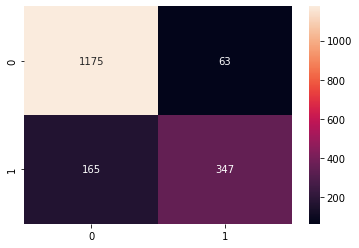

In [616]:
c = confusion_matrix(Y, Ytrain_pred)
import seaborn as sns

sns.heatmap(c, annot=True, fmt='d' )

# Model comparison

In [2]:
!pip install prettytable

In [3]:
from prettytable import PrettyTable

In [4]:
p = PrettyTable()
p.field_names = ['model', 'score']
p.add_row(['logistic_regression',0.7283058828855056])
p.add_row(['svm',0.7306477629506805])
p.add_row(['Random Forest',0.8179995484871171])
p.add_row(['xgboost',0.8563939654855547])

# Conclusion

- Income(+), KID_CATEGORY_DESC (+), AGE_DESC(-) has large variances across them wrt to each category as compared to the total variance in the sales_value so these are the variables impacting most.
- We have considered quarterly analysis and used the time series based features.
- we found that groceries are the most purchased categories. 
- Also our analysis does include the customers which are growing over the time. 


In [12]:
# comparing the scores of various models
print(p)

+---------------------+--------------------+
|        model        |       score        |
+---------------------+--------------------+
| logistic_regression | 0.7283058828855056 |
|         svm         | 0.7306477629506805 |
|    Random Forest    | 0.8179995484871171 |
|       xgboost       | 0.8563939654855547 |
+---------------------+--------------------+


In [562]:
# sample_submission_df = pd.read_csv('sample_submission.csv')
target_testfile_df = pd.read_csv('test_file.csv')

target_df = campaign_demo_tran_test_df.merge(target_testfile_df, on='household_key', how='inner' )
target_df.drop(['bought_nutrition', 'household_key'], axis=1, inplace=True)
Y_target_pred = xgbc.predict(target_df)
result = target_testfile_df.copy()
result['bought_nutrition']=Y_target_pred

In [591]:
result.to_csv('ramavtar_submission.csv')

# ----- IGNORE BELOW  --------

In [533]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df2.index)),df2,1,full=True)

Text(0, 0.5, 'Temperature [°C]')

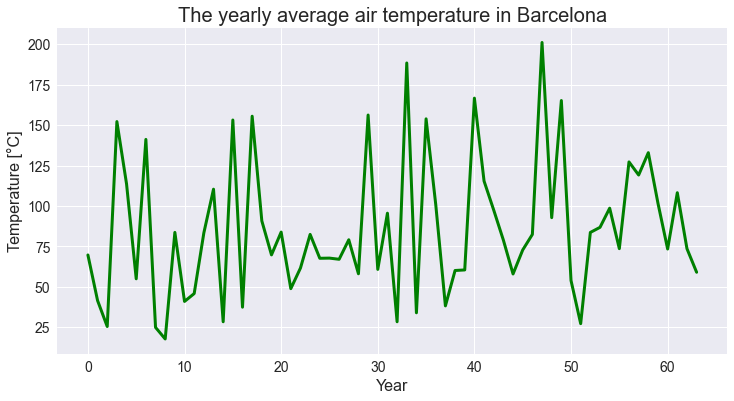

In [498]:
%matplotlib inline
plt.style.use('seaborn')

# line plot - the yearly average air temperature in Barcelona
sv.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

In [505]:
sv.rolling(3, min_periods=1).mean()


0      69.780000
1      55.700000
2      45.656667
3      73.116667
4      97.123333
         ...    
59    117.923333
60    102.686667
61     94.443333
62     85.103333
63     80.313333
Name: SALES_VALUE, Length: 64, dtype: float64

In [450]:
l = df.groupby('WEEK_NO')['SALES_VALUE'].sum().reset_index()['SALES_VALUE'].values
n = 5
increasing_trend_checker(l, n)

False

In [446]:
df.groupby('WEEK_NO')['SALES_VALUE'].sum().sort_index(ascending=False).head(12).sum()

1138.22

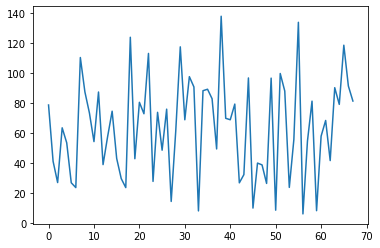

In [375]:
plt.plot(df.SALES_VALUE.values)
df.SALES_VALUE.values.

In [372]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['SALES_VALUE'].values, model='multiplicative', period=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[ 78.66  41.1   26.9   63.43  53.45  26.76  23.55 110.34  87.44  73.32
  54.23  87.32  38.88  57.5   74.52  42.98  29.55  23.54 123.86  42.8
  80.45  72.82 113.07  27.67  73.77  48.5   75.88  14.31  61.23 117.46
  68.8   97.57  90.71   7.99  88.2   89.18  82.84  49.33 137.88  69.78
  68.81  79.27  26.72  32.2   96.71   9.88  39.9   38.69  26.32  96.59
   8.47  99.68  87.98  23.67  55.55 133.84   5.98  54.71  81.23   8.14
  57.88  68.34  41.57  90.21  79.07 118.56  91.33  81.29]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 78.66  41.1   26.9   63.43  53.45  26.76  23.55 110.34  87.44  73.32
  54.23  87.32  38.88  57.5   